<a href="https://colab.research.google.com/github/Evanaxander/Machine-Learning-Algorithms-with-codes/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Classification in Python**

# First a scenario:

As a marketing manager, you want a set of customers who are most likely to purchase your product. This is how you can save your marketing budget by finding your audience. As a loan manager, you need to identify risky loan applications to achieve a lower loan default rate. This process of classifying customers into a group of potential and non-potential customers or safe or risky loan applications is known as a classification problem.

Classification is a two-step process; a learning step and a prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response to given data. A Decision tree is one of the easiest and most popular classification algorithms used to understand and interpret data. It can be utilized for both classification and regression problems.

# The Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

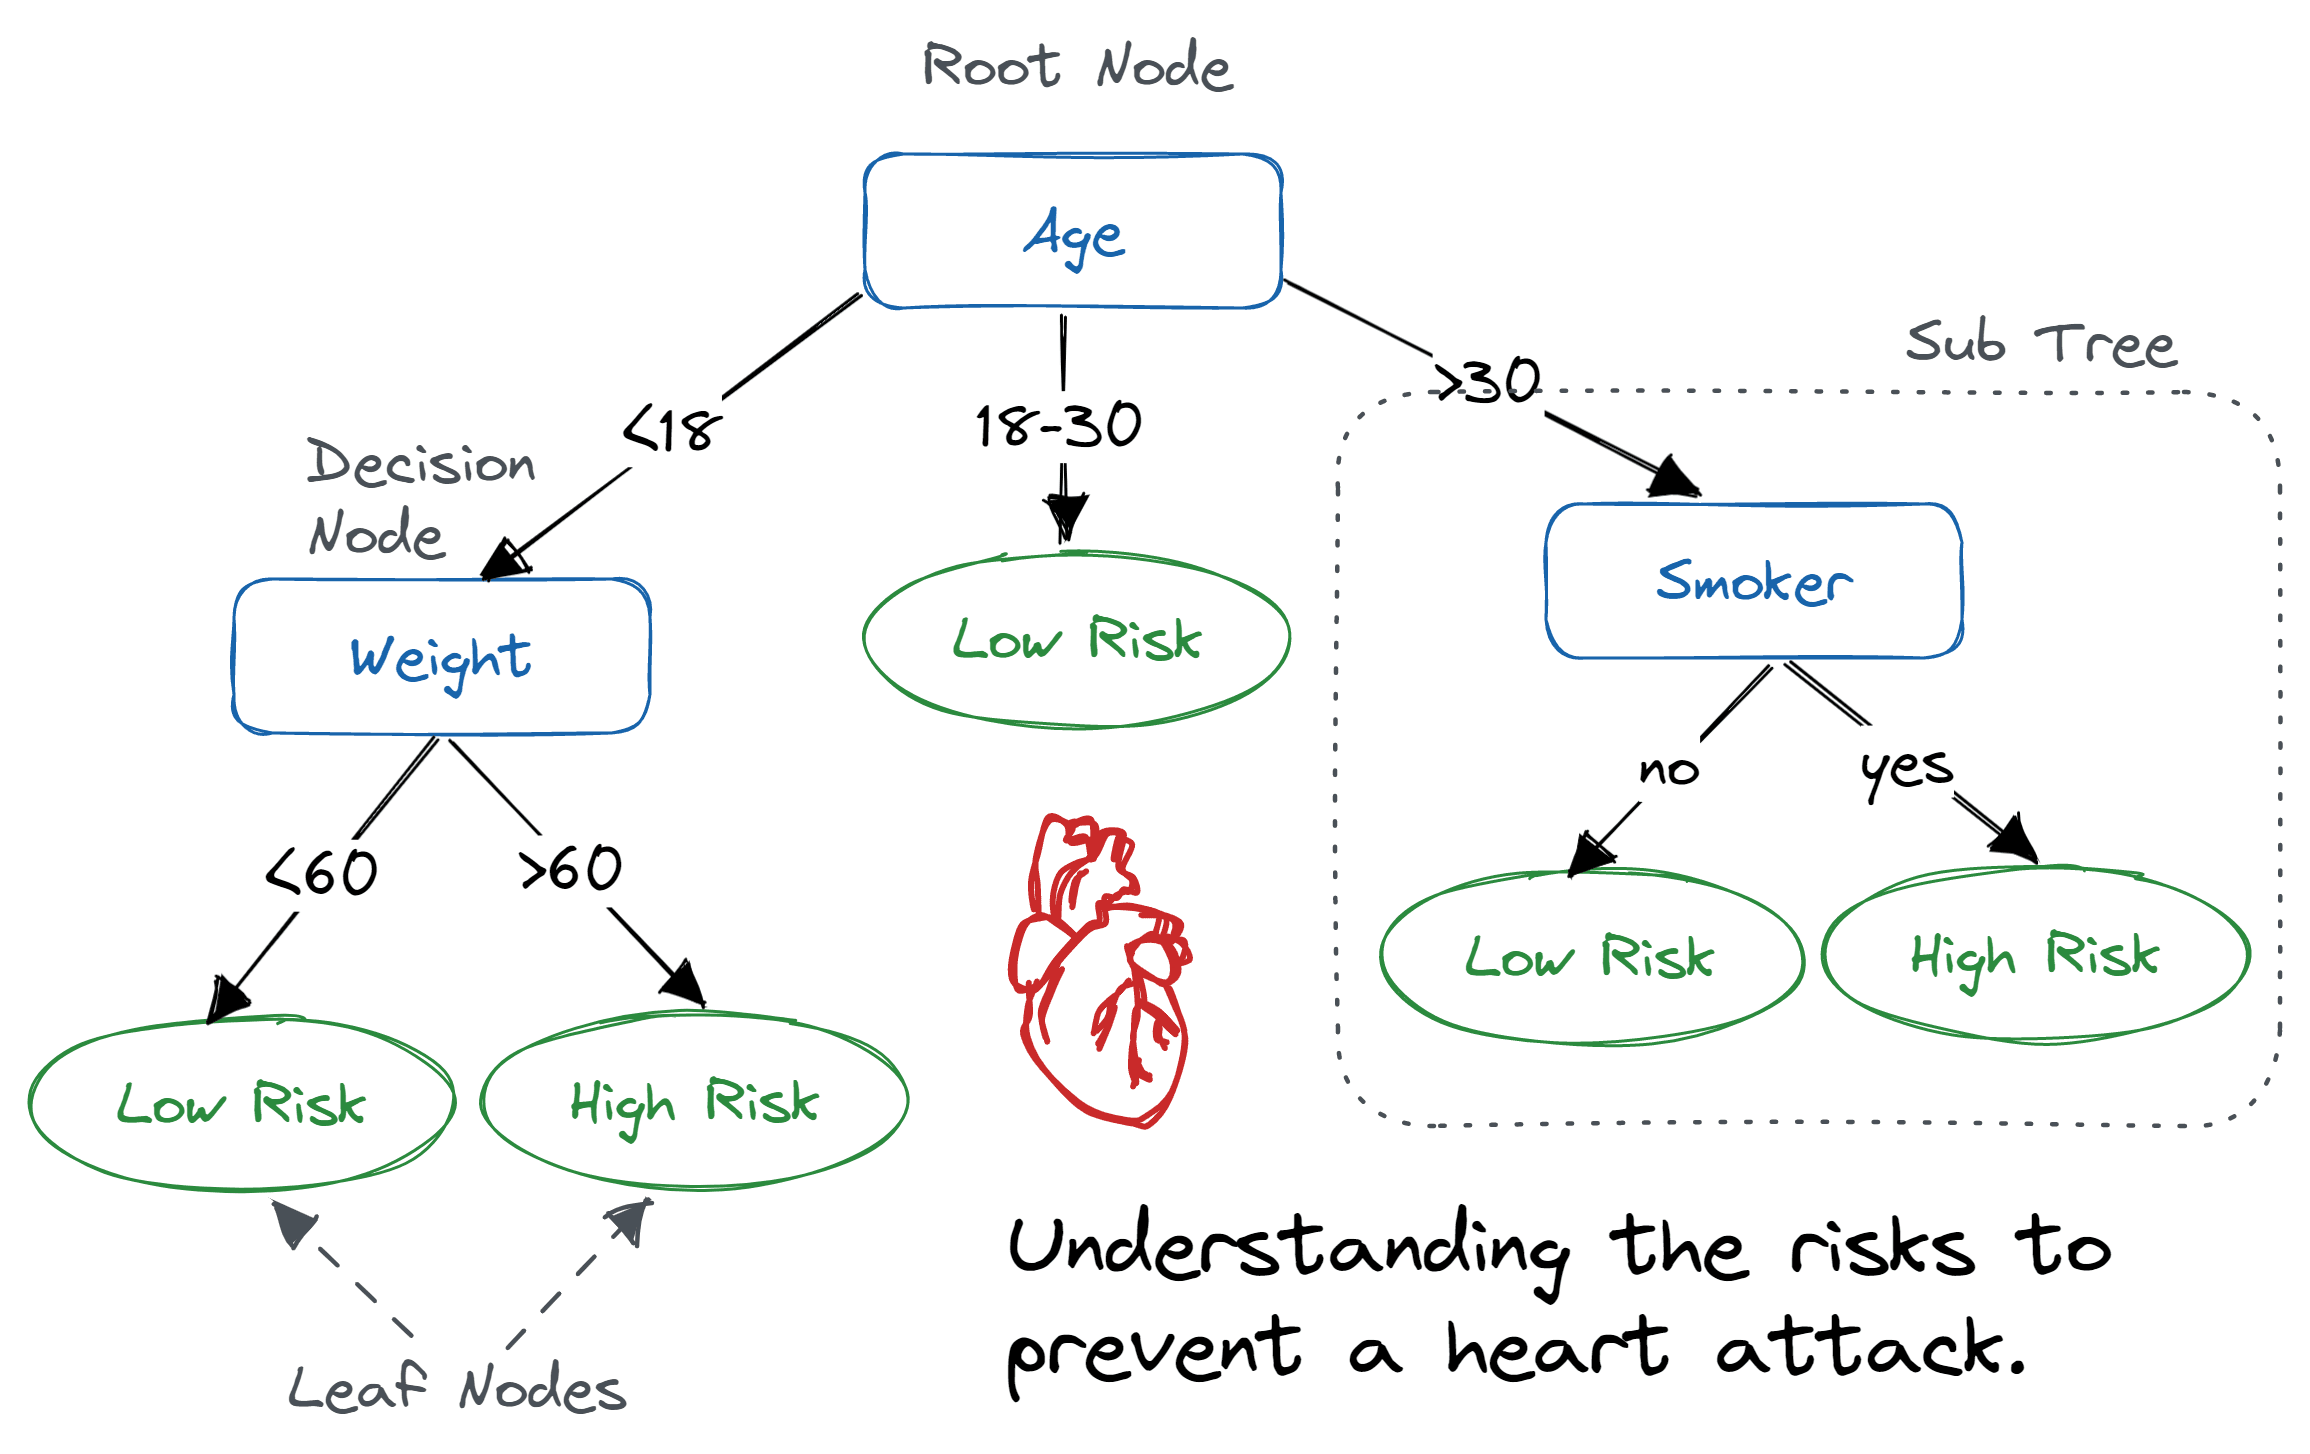

A decision tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as with a neural network. Its training time is faster compared to the neural network algorithm.

The time complexity of decision trees is a function of the number of records and attributes in the given data. The decision tree is a distribution-free or non-parametric method which does not depend upon probability distribution assumptions. Decision trees can handle high-dimensional data with good accuracy.

# How Does the Decision Tree Algorithm Work?

The basic idea behind any decision tree algorithm is as follows:

1.   Select the best attribute using Attribute Selection Measures (ASM) to split the records.
   List item
2.  Make that attribute a decision node and breaks the dataset into smaller subsets.
3.  Start tree building by repeating this process recursively for each child until one of the conditions will match:



*   All the tuples belong to the same attribute value.
*  There are no more remaining attributes.
*   There are no more instances.


2_btay8n.avif









# Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partitions data in the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature (or attribute) by explaining the given dataset. The best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. The most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

# Information Gain

Claude Shannon invented the concept of entropy, which measures the impurity of the input set. In physics and mathematics, entropy is referred to as the randomness or the impurity in a system. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before the split and average entropy after the split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

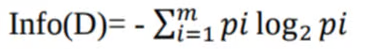

Where Pi is the probability that an arbitrary tuple in D belongs to class Ci.



![image.png](
  

)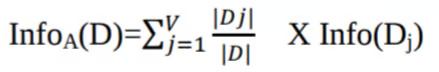

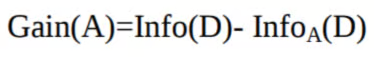

Where:



*  Info(D) is the average amount of information needed to identify the class label of a tuple in D.
*  |Dj|/|D| acts as the weight of the jth partition.
*  InfoA(D) is the expected information required to classify a tuple from D based on the partitioning by A.

The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N().

# Gain Ratio

Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier, such as customer_ID, that has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info. Java implementation of the C4.5 algorithm is known as J48, which is available in WEKA data mining tool.

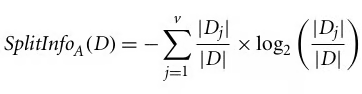

Where:



*  |Dj|/|D| acts as the weight of the jth partition.
* v is the number of discrete values in attribute A.


The gain ratio can be defined as


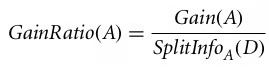

# Gini index

Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.

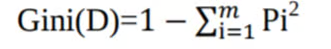

Where pi is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a binary split for each attribute. You can compute a weighted sum of the impurity of each partition. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

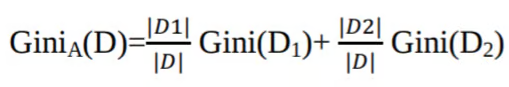

In the case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split point, and a point with a smaller gini index is chosen as the splitting point.

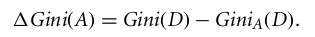

The attribute with the minimum Gini index is chosen as the splitting attribute.

# **# Decision Tree Classifier Building in Scikit-learn:**

# Importing Libraries


```



In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 15.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
# Defining the path to the dataset
file_path = '/root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv'

# Loading the dataset into a DataFrame
pima = pd.read_csv(file_path,  header=None, names=col_names)

# Displaying the first few rows of the dataset
print(pima.head())

      pregnant  glucose             bp           skin  insulin   bmi  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

                   pedigree  age    label  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']



## Feature Selection

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


This code is written in Python and it is used to split a dataset into features and target variable.


The first line defines a list of feature columns that will be used to create the feature matrix. The list contains the names of the columns that will be used as features, which are 'pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', and 'pedigree'.


The second line creates a feature matrix X by selecting the columns specified in the feature_cols list from the pima dataset. The feature matrix X will contain the values of the selected columns for each observation in the dataset.


The third line creates a target variable y by selecting the 'label' column from the pima dataset. The target variable y will contain the values of the 'label' column for each observation in the dataset.


Overall, this code is used to prepare the data for machine learning by separating the features and target variable into separate variables.

# Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


This code uses the train_test_split function from the sklearn.model_selection module to split a dataset into a training set and a test set.


The X and y variables represent the features and target variable of the dataset, respectively. The test_size parameter is set to 0.3, which means that 30% of the data will be used for testing and 70% will be used for training. The random_state parameter is set to 1, which ensures that the same random split is generated each time the code is run.


The function returns four arrays: X_train, X_test, y_train, and y_test. X_train and y_train represent the training set, while X_test and y_test represent the test set. These arrays can be used to train and evaluate a machine learning model.



# Building Decision Tree Model

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


ValueError: could not convert string to float: 'Pregnancies'

**I got a value error because "ValueError: could not convert string to float: 'Pregnancies'**

I need to convert the string columns to numerical representations before training and prediction. One common approach is to use** Label Encoding** or** One-Hot Encoding**. Assuming 'Pregnancies' is a categorical feature, here's how I can apply Label Encoding to all object type columns in your DataFrame 'X' before splitting it into training and testing sets:

In [ ]:
# Ensure all columns used in the model are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Converts columns to numeric, replacing non-numeric with NaN
X_test = X_test.apply(pd.to_numeric, errors='coerce')    # Same for test data

In [ ]:
# Drop rows with NaN values (optional, depends on your dataset)
X_train = X_train.dropna()
X_test = X_test.dropna()

In [ ]:
# Check if the feature columns and labels are correctly aligned
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')
Columns in X_test: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [ ]:
# Confirm data types
print(X_train.dtypes)

pregnant      int64
insulin       int64
bmi         float64
age           int64
glucose       int64
bp            int64
pedigree    float64
dtype: object


Back to building **model**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

This code is written in Python and it creates a decision tree classifier object using the DecisionTreeClassifier() function. Then, it trains the classifier using the fit() method with the training data X_train and y_train. Finally, it uses the trained classifier to predict the response for the test dataset X_test and stores the predictions in y_pred.

## Evaluating the Model

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [231, 230]

**Another error!**

The error message "ValueError: Found input variables with inconsistent numbers of samples: [231, 230]" indicates that the y_test and y_pred arrays have different shapes/lengths. metrics.accuracy_score requires both input arrays to have the same number of samples to be able to compare the predicted values against the true values.

From the Global variables section, we know that y_pred has a shape of (230,). This suggests that it contains 230 elements. However, the traceback indicates that y_test has 231 samples. This shape mismatch is causing the ValueError.

The mismatch could have been caused during the train-test split or in the subsequent steps. Since y_test is expected to have one more element than y_pred, this points to an error during train-test split. We should ensure the shapes of X_train, y_train, X_test, and y_test are aligned and consistent. It might be that we need to adjust train_size and test_size parameters during data splitting to resolve the issue.

Causes:

1.   Mismatch in the dataset size: Some rows in X_test might have been removed (e.g., NaN values) after preprocessing, but y_test was not updated accordingly.
2.   Misalignment: y_test may not correspond to the processed rows in X_test.



**solution**

1) Ensure Consistent Lengths: Align y_test with the rows of X_test after preprocessing.

In [ ]:
# Align y_test with X_test after any changes to X_test
y_test = y_test.loc[X_test.index]


2) # Align y_test with X_test after any changes to X_test
y_test = y_test.loc[X_test.index]


In [ ]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_test: (230, 7)
Shape of y_test: (230,)


3) Recheck Predictions: Ensure that predictions are made on the processed X_test.

In [ ]:
y_pred = clf.predict(X_test)


4) Final Accuracy Calculation: Once lengths are aligned, compute the accuracy:

Back to **evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7217391304347827


We got a classification rate of 72.17%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

# Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.

In [ ]:
!pip install pydotplus six
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.


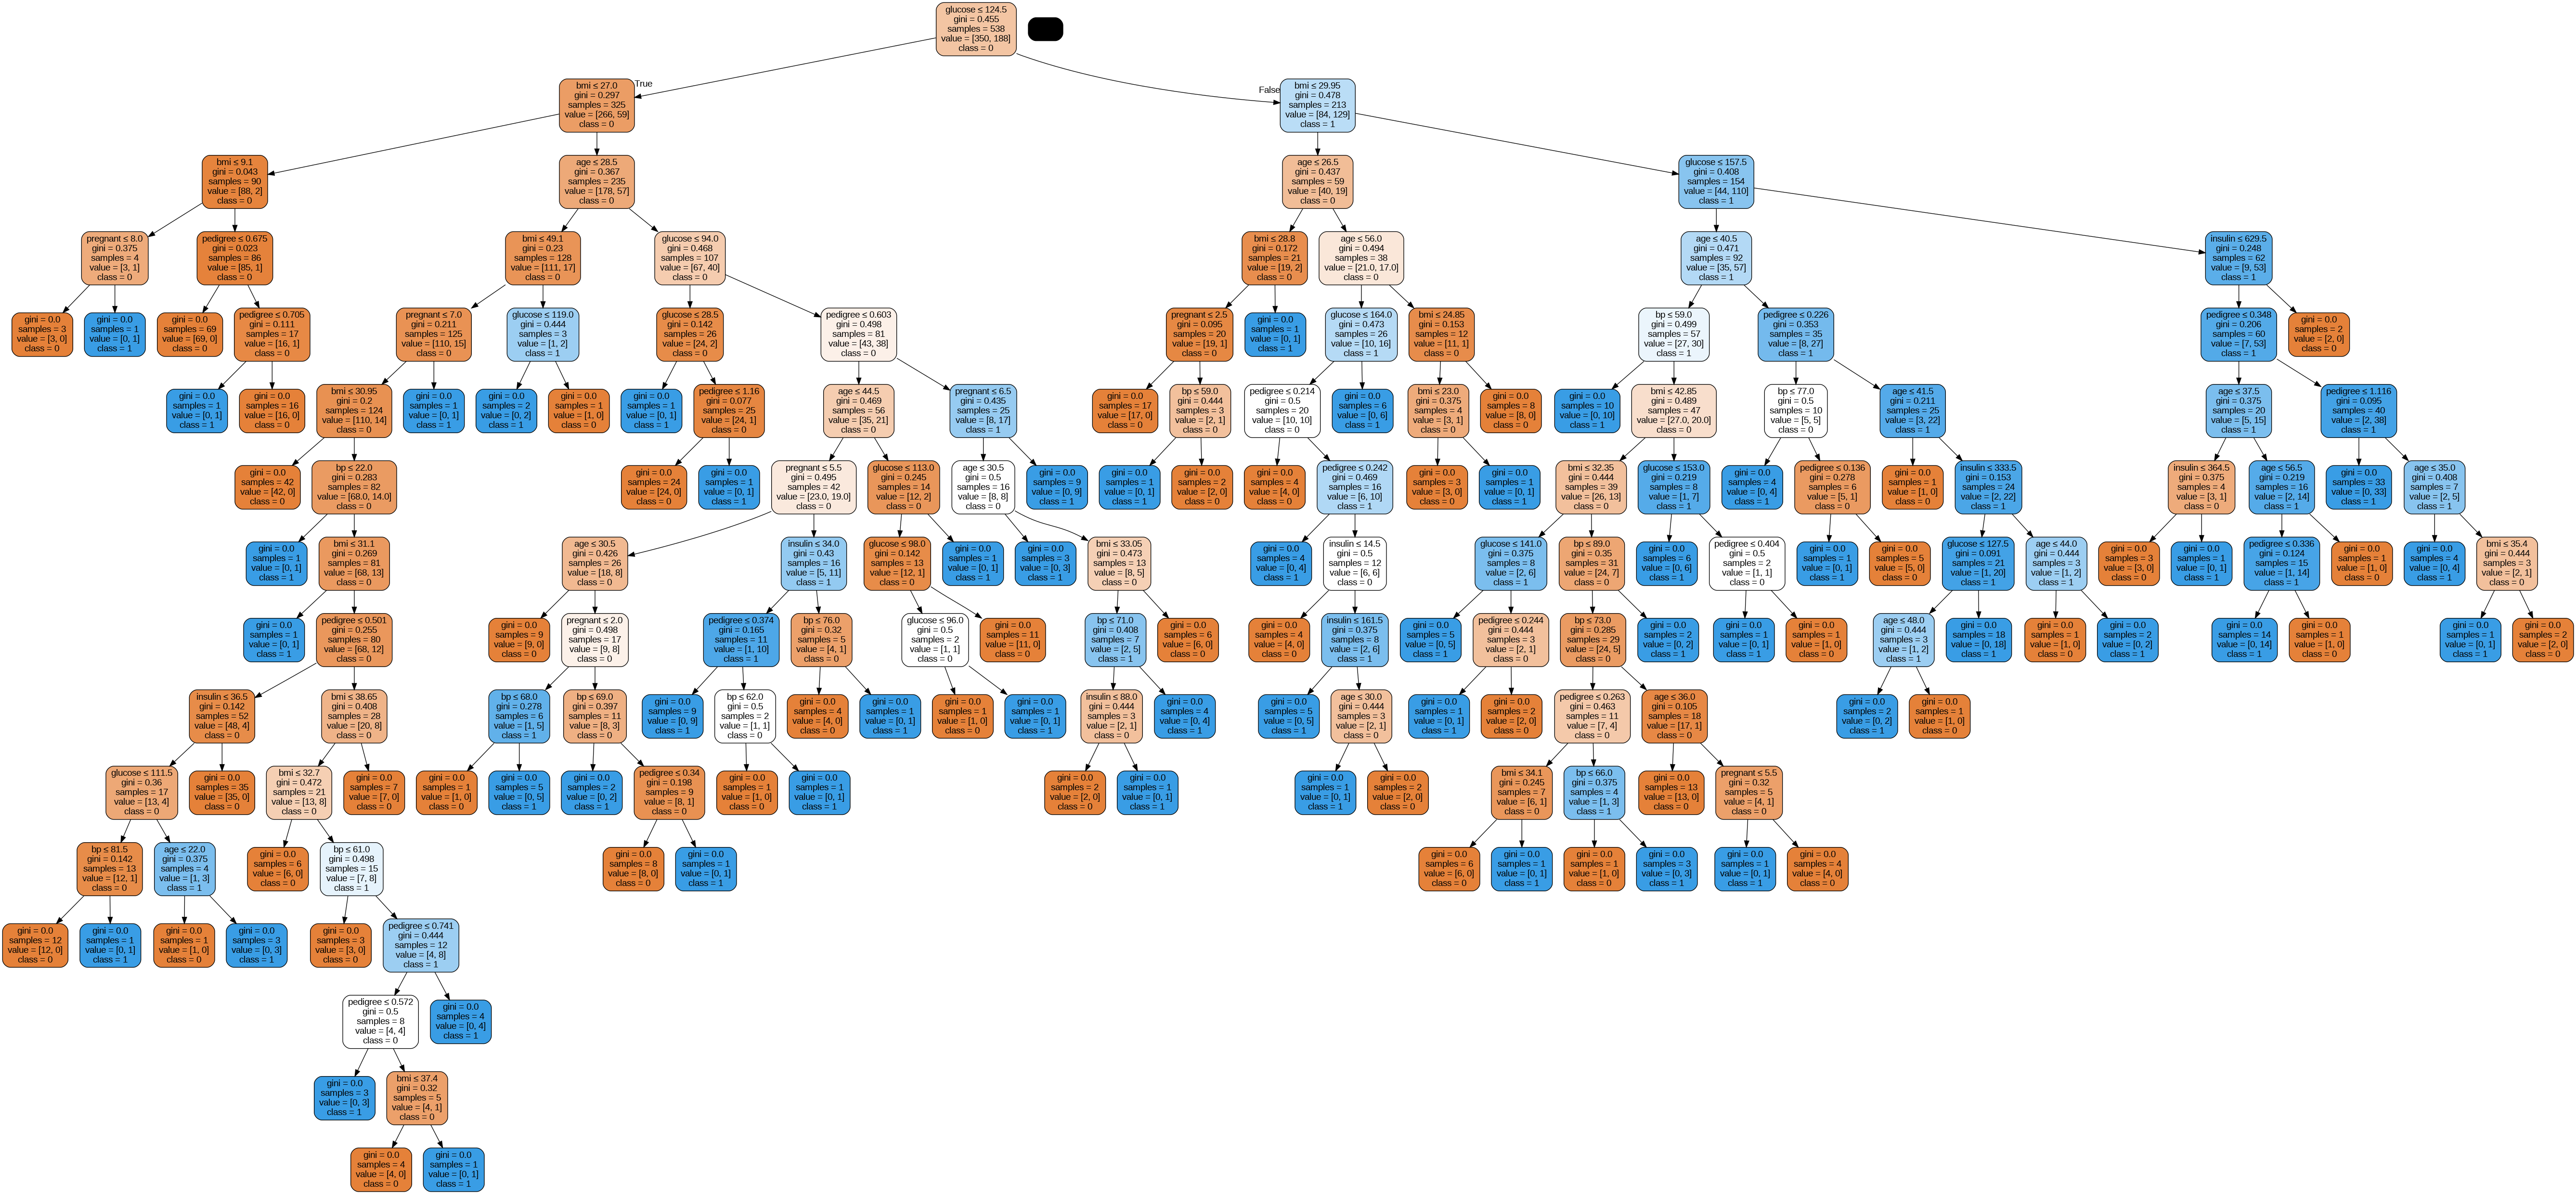

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  # Use the `six` library directly
from IPython.display import Image
import pydotplus

# Generate the DOT data for the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0', '1'])

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG file
graph.write_png('diabetes.png')

# Display the image in the notebook
Image(graph.create_png())


In the decision tree chart, each internal node has a decision rule that splits the data. Gini, referred to as Gini ratio, measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

# Optimizing Decision Tree Performance

**criterion** : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

**splitter **: string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7478260869565218


This is a better accuracy than the previous model.

# Visualizing Decision Trees

decision tree is made a little easier to understand using the following code:

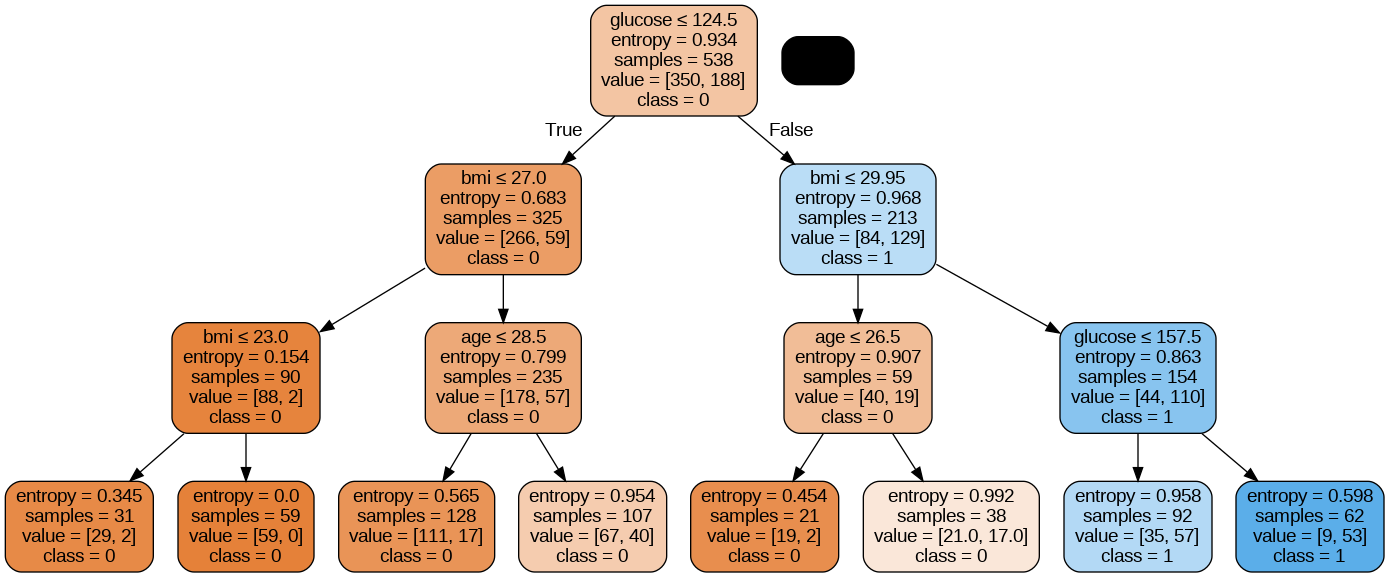

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Here, we've completed the following steps:



*   Imported the required libraries.

*   Created a StringIO object called dot_data to hold the text representation of the decision tree.
* Exported the decision tree to the dot format using the export_graphviz function and write the output to the dot_data buffer.


*   Created a pydotplus graph object from the dot format representation of the decision tree stored in the dot_data buffer.


*   Written the generated graph to a PNG file named "diabetes.png".
*   Displayed the generated PNG image of the decision tree using the Image object from the IPython.display module.

As you can see, this pruned model is less complex, more explainable, and easier to understand than the previous decision tree model plot.





# Decision Tree Pros



*   Decision trees are easy to interpret and visualize.

*  It can easily capture Non-linear patterns.

*  It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
*   It can be used for feature engineering such as predicting missing values, suitable for variable selection.


*   The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.





# Decision Tree Cons



*   Sensitive to noisy data. It can overfit noisy data.

*   The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
*   Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.






# Conclusion:

 Here, I covered a lot of details about decision trees; how they work, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization, and evaluation of a diabetes dataset using Python's Scikit-learn package. I also discussed its pros, cons, and how to optimize decision tree performance using parameter tuning.